In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import joblib

In [64]:
data = pd.read_csv('/Users/playo/Desktop/loan approval/loan_approval_dataset.csv')
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [65]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [66]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [67]:
data.describe(include ='object')

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


In [68]:
# chance of getting loan approved if you are self employed
df = data[data[" self_employed"]==" Yes"]
count1,_ = df.shape
count2,_ = df[df[" loan_status"]==" Approved"].shape
print(f"Probability of getting approved your loan if you are self-employeed :{count2/count1}")

Probability of getting approved your loan if you are self-employeed :0.6223255813953489


In [69]:
data.head(2)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected


<Axes: xlabel=' loan_status', ylabel='count'>

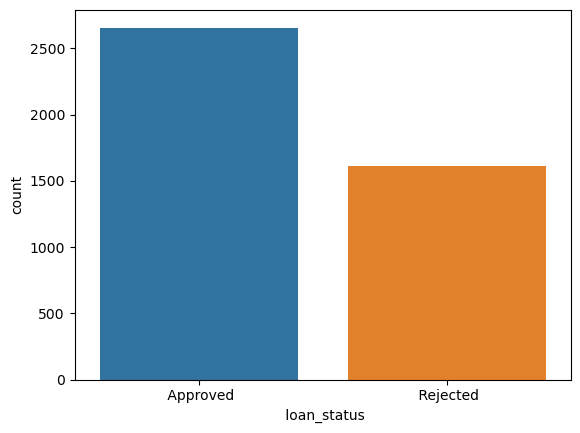

In [70]:
# countplot is a histogram across a categorical variable
sns.countplot(x =' loan_status',data=data)

<Figure size 800x600 with 0 Axes>

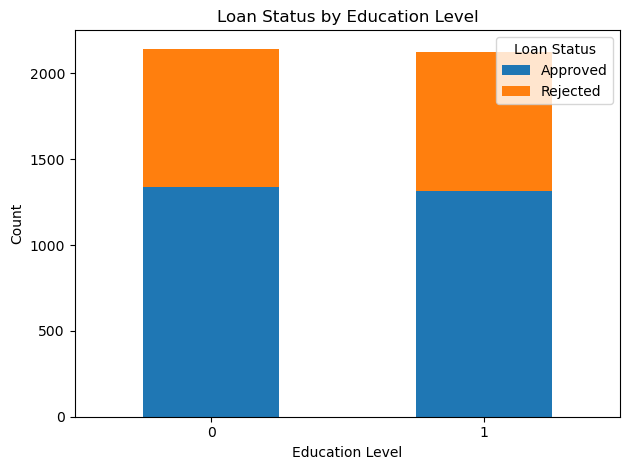

In [79]:
data.columns = data.columns.str.strip()

if 'education' in data.columns and 'loan_status' in data.columns:
    # Group the data by 'education' and 'loan_status' and count the occurrences
    education_loan_status_counts = data.groupby(['education', 'loan_status']).size().unstack()

    # Plot the bar chart
    plt.figure(figsize=(8, 6))
    education_loan_status_counts.plot(kind='bar', stacked=True)
    plt.title('Loan Status by Education Level')
    plt.xlabel('Education Level')
    plt.ylabel('Count')
    plt.legend(title='Loan Status', loc='upper right', labels=['Approved', 'Rejected'])
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

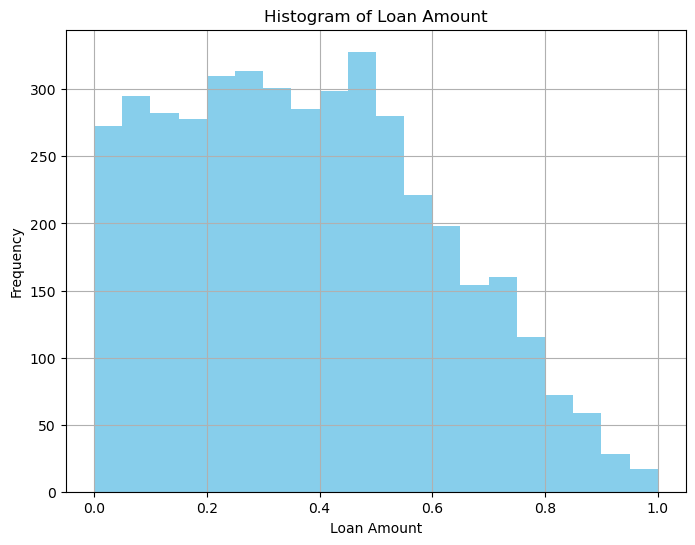

In [80]:
plt.figure(figsize=(8, 6))
plt.hist(data['loan_amount'], bins=20, color='skyblue')
plt.title('Histogram of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [71]:
# check average Cibil score to get approved
df = data[data[" loan_status"]==" Approved"]
print(f"The average cibil score:{df[' cibil_score'].mean()}")

The average cibil score:703.4619728915662


In [72]:
numcol = []
for col in data.columns:
    if data[col].dtypes == "int64":
        numcol.append(col)
    
print(numcol)

['loan_id', ' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']


In [73]:
# Label encoding
# https://www.mygreatlearning.com/blog/label-encoding-in-python/
# make everything numerical
label_encoder = LabelEncoder() # Onehotencoder
data[" education"]=label_encoder.fit_transform(data[" education"])
data[" self_employed"]=label_encoder.fit_transform(data[" self_employed"])
data[" loan_status"]=label_encoder.fit_transform(data[" loan_status"])
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [74]:
# MaxMin Scalar
# takes data values and makes them to scale
# https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
scaler = MinMaxScaler()
for col in numcol:
    data[[col]] = scaler.fit_transform(data[[col]])
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.000000,0.4,0,0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0
1,0.000234,0.0,1,1,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1
2,0.000469,0.6,0,0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,1
3,0.000703,0.6,0,0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,1
4,0.000937,1.0,1,1,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1


In [75]:
# drop loan_id column
df = data.drop('loan_id',axis=1) # taking data and dropping loan_id and getting a data frame with a columns without loan_id
X = df.drop(" loan_status",axis = 1) # x is assigned to a dataframe where you drop loan status loan id
y = df[' loan_status'] # returns a series of all the different values
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.4,0,0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0
1,0.0,1,1,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1
2,0.6,0,0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,1
3,0.6,0,0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,1
4,1.0,1,1,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle = True,random_state=42, test_size=0.25)
# i have data, I am going to have a X train, X test, y Train, y test and shuffle the values and random_state(making sure result is the same), test_size(determines how much of data is put towards the test, if you have 100 sets of data, 75 is train, and 25 test)

In [77]:
models = {
    'Logistic Regression':LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifer':DecisionTreeClassifier(),
    'SVM':SVC()
}

In [81]:
for i in range(len(models)):
    # run through every model
    model = list(models.values())[i]
    # fitting a logistic regression model to training set
    model.fit(X_train,y_train)
    # runs the model on the data set
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    model_name = list(models.keys())[i]
    print(model_name)
    print("Training dataset accuracy: ")
    print("Accuracy : ",accuracy_score(y_train,train_preds))
    print()
    print("Training dataset accuracy: ")
    print("Accuracy : ",accuracy_score(y_test,train_preds))
    print()
    print('-------------------------------------------------')

Logistic Regression
Training dataset accuracy: 
Accuracy :  0.9194001874414246

Training dataset accuracy: 
Accuracy :  0.9110486891385767

-------------------------------------------------
RandomForestClassifier
Training dataset accuracy: 
Accuracy :  1.0

Training dataset accuracy: 
Accuracy :  0.9812734082397003

-------------------------------------------------
DecisionTreeClassifer
Training dataset accuracy: 
Accuracy :  1.0

Training dataset accuracy: 
Accuracy :  0.9812734082397003

-------------------------------------------------
SVM
Training dataset accuracy: 
Accuracy :  0.9497032177444549

Training dataset accuracy: 
Accuracy :  0.9288389513108615

-------------------------------------------------
